In [ ]:
url = 'https://en.wikipedia.org/wiki/Data_science'

In [15]:
#Getting the Data usingthe requests library
import requests
url = 'https://en.wikipedia.org/wiki/Data_science'
text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"b6ee5d1e-673e-422b-9c2e-d18af0b1d737","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1096890868,"wgRevisionId":1096890868,"wgArticleId":35458904,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description matches Wikidata","Use dmy dates from August 2021","Information science","Computer occupations","Comput

In [16]:
#Transforming the Data by converting HTML source code to text and then using HTMLParser to subclass the HTMLParser class 


from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])



 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Data science  is an  interdisciplinary  field that uses  scientific methods , processes,  algorithms  and systems to extract  knowledge  and insights from noisy, structured and  unstructured data , [1] [2]  and apply knowledge from data across a broad range of application domains. Data science is related to  data mining ,  machine learning  and  big data . [3] Data science is a "concept to unify  statistics ,  data analysis ,  informatics , and their related  methods " in order to "understand and analyse actual  phenomena " with  data . [4]  It u

In [1]:
#Getting Insights using RAKE for keyword extraction
import sys
!{sys.executable} -m pip install nlp-rake

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 54.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 41.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 749.7/749.7 KB 52.2 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=ef06c2ec7c2e4f531b89d42eef8e38d213ac16f0794ba61ed75cc959f56353aa
  Stored in directory: /home/jovyan/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [17]:
#Set parameters ike minimum keyword length, minimum keyword frequency and maximum number of words in a keyword
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.909090909090909),
 ('information science', 3.909090909090909),
 ('computer science', 3.909090909090909),
 ('application domains', 3.75),
 ('data analysis', 3.666666666666667),
 ('science', 1.9090909090909092),
 ('insights', 1.25),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

In [22]:
#Make Visualization library available
!{sys.executable} -m pip install wordcloud
!{sys.executable} -m pip install matplotlib

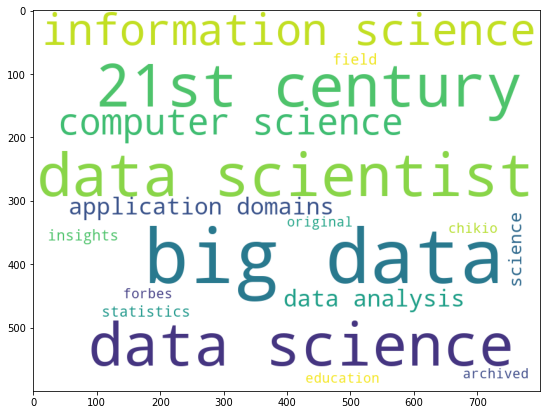

In [26]:
#Visualizing the results
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white', width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({k:v for k,v in res}))